# Per fighter analysis

in this notebook I'll focus on the per fighter dataset that I've constructed in order to get a general feel for what sort of trends we can see in the data. its possible this may inform the eventual dashboard, or that it will end up useless. who knows...

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')  # gets rid of agitating boxes by plots

## Read in / quick analysis

First just read data in and get a handle on the usual shite like NULLs, unique value counts, ranges, etc...

In [54]:
df = pd.read_csv('../data/per_fighter_recent.csv')

df.head()

,fighter,odds,date,weight_class,gender,current_lose_streak,current_win_streak,avg_SIG_STlanded,avg_SIG_STpct,avg_TD_landed,...,td_landed_bout_mean,td_attempted_bout_mean,td_pct_bout_mean,sub_attempts_bout_mean,pass_bout_mean,rev_bout_mean,location_mode,date_amin,date_amax,bout_id_unique
0,Jun Yong Park,-138,2019-12-21,Middleweight,MALE,1,0,NaN,0.52170,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,"Busan, South Korea",2019-12-21,2019-12-21,['a1d134d4b20108d35642cb5c1ff2c55b']
1,Aalon Cruz,-190,2020-02-29,Featherweight,MALE,0,0,9.04,0.40000,0.0,...,0.0,1.000000,0.000000,0.0,0.000000,0.0,"Norfolk, Virginia, USA",2020-02-29,2020-02-29,['c8e695a49080fdac9137cd848fb8ca8d']
2,Aaron Phillips,475,2020-07-15,Bantamweight,MALE,2,0,NaN,NaN,0.0,...,0.0,0.500000,0.000000,0.5,0.500000,0.5,"['Abu Dhabi, Abu Dhabi, United Arab Emirates' ...",2014-05-24,2020-07-15,['571c2a7c29b76edaf0b9cad8c2b57d7d' '9d48bf025...
3,Aaron Riley,220,2013-07-27,Lightweight,MALE,1,0,36.00,0.36875,1.0,...,1.0,2.666667,0.123333,0.0,1.333333,0.0,"['Denver, Colorado, USA' 'Las Vegas, Nevada, U...",2010-05-29,2013-07-27,['4ecde1cf1408af7182d5b541a1d2a795' '5b3eab509...
4,Aaron Rosa,315,2012-03-02,Light Heavyweight,MALE,0,1,NaN,NaN,0.0,...,0.0,0.500000,0.000000,0.0,0.000000,0.0,"['Anaheim, California, USA' 'Sydney, New South...",2011-06-11,2012-03-02,['3c3697a651acc0e221012d5dfac92183' '512bbda44...


<AxesSubplot:>

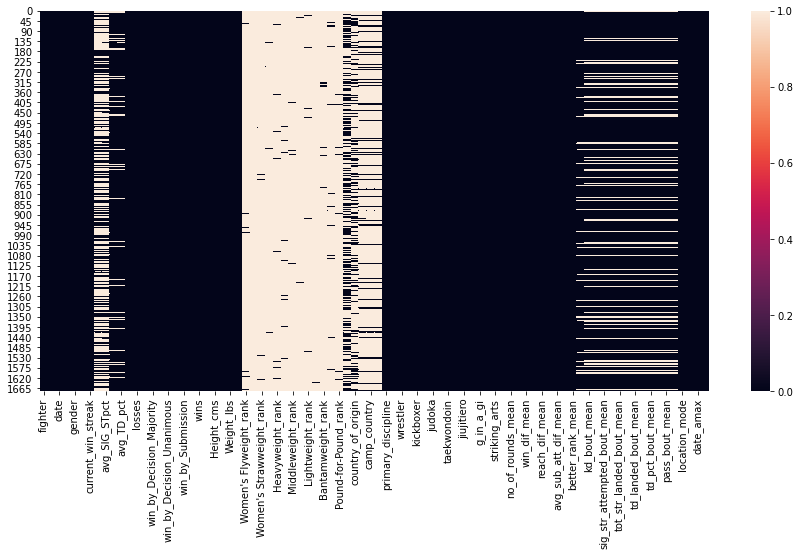

In [55]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(df.isnull(), ax=ax)

probs should reduce this down to just the columns with NULLs in it for readability actually...

looks like we loose about 100 fighters nationalities compared to the size of that file. I guess we're going to have to do some more thorough cleaning of the data prior to the join, most likely on the per_fight csv rather than the nationality one

<AxesSubplot:>

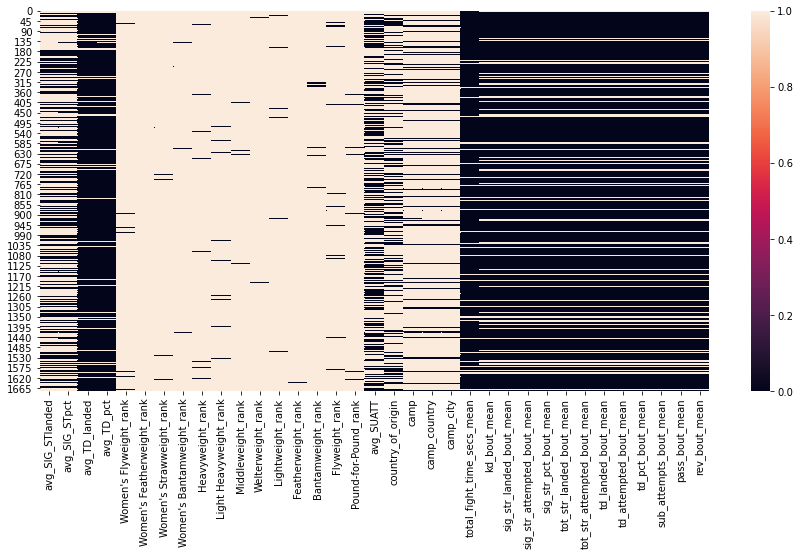

In [56]:
nulls = df.isnull()
nulls = nulls.loc[:, nulls.any()].columns  # get only columns with at least one NULL in

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df[nulls].isnull(), ax=ax)

The rank variables are massively NULL, which is to be expected as only the top 15 fighters in each weightclass are ranked, though I guess since I'm not scraping current ranks, its possible for fighters who havent fought since loosing / gaining rank status wil incorrectly have a filled or NULL value in these columns respectively (especially true for retired fighters who went out relatively well respected). 

Beyond that we see that camp dataset is largely useless which to be fair is as expected. We also see that the mean statistics per fighter are often NULL for the same row i.e. a given fighter will be all NULL for these columns or not. It remains to be seen why that might be the case.

for the default second graph we'll do the unique value count of the non numeric columns just to get a feel for how much variety we're seeing there.

<AxesSubplot:>

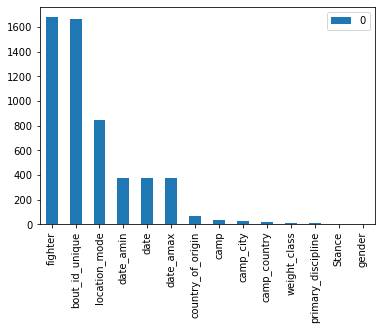

In [57]:
objs = df.select_dtypes(include=[object])
objs = pd.DataFrame(objs.nunique())
objs.sort_values(by=0, ascending=False, inplace=True)
objs.plot(kind='bar')

I'm supprised by location_mode having so many unqiue values, as that points to the city most commonly fought in, which I expected to be majority Vegas?